In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

In [2]:
def HeaderMaker(PatientFile):
#     df_cleaned = pd.read_csv('/data/ortho/' + PatientFile, header=None)
    df_cleaned = pd.read_csv(PatientFile, header=None)

    df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
    df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
    df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
    df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
    df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
    df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
    df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
    df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
    df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
    df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})
    
    return df_cleaned

def VisualizeItems(items, x, y, z, iterstart = 0, iterend = 0):
    for imageNum, i in enumerate(items):
        if iterstart != 0 or iterend != 0:
            if iterstart >= imageNum and iterstart != 0:
                continue
            if iterend <= imageNum and iterend != 0:
                break
        

        fig = plt.figure()
        
        try:
            splitted = i.split('.')[0].split('_')
            Cat = splitted[0].split('/step2/')[1]
            pat = splitted[1]
            meting = splitted[2]
            oef = splitted[3]
            split = splitted[4]
            titel = '%s %s %s %s %s' % (Cat, pat, meting, oef, split)
        except(IndexError):
            oef = 'failed'
            titel = i

        data = HeaderMaker(i)

        xlist = data[x]
        ylist = data[y]
        zlist = data[z]
        
        plt.title(titel)
#         plt.ylim((-180,180))
        plt.plot(xlist, color = 'red')
        plt.plot(ylist, color = 'blue')
        plt.plot(zlist, color = 'green')
        plt.legend()
        
    plt.tight_layout()  
    plt.show()

def CreateList(keywordslist, dellist = []):
    allitems = listdir('/datc/ortho/Cleaning/step2')
    filteredlist = []
    for i in keywordslist:
        for x in allitems:
            if (i in x):
                filteredlist.append(x)
        allitems = filteredlist
        filteredlist = []
    finallist = []
    filteredlist = []
    for i in dellist:
        for x in allitems:
            if i not in x:
                filteredlist.append(x)
        allitems = filteredlist
        filteredlist = []
    for i in allitems:
        finallist.append('/datc/ortho/Cleaning/step2/%s' % i)
    return finallist

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


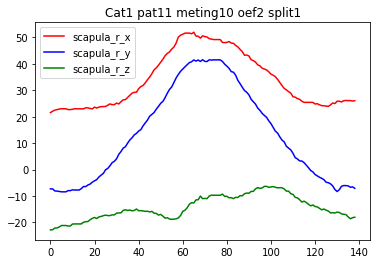

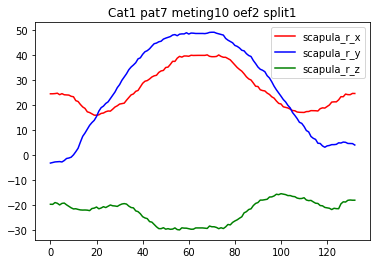

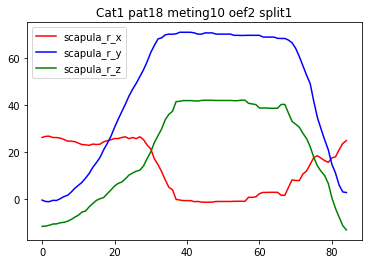

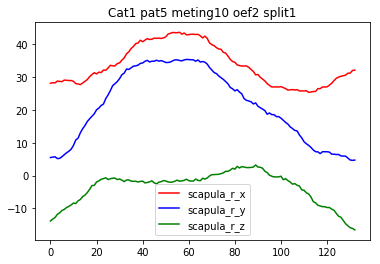

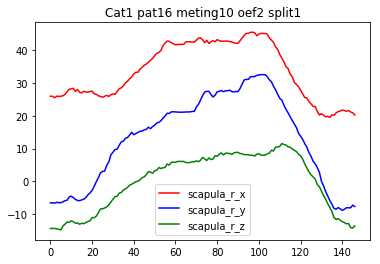

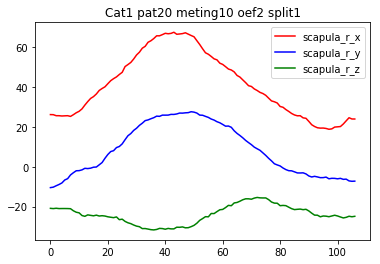

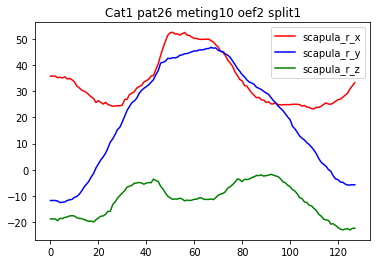

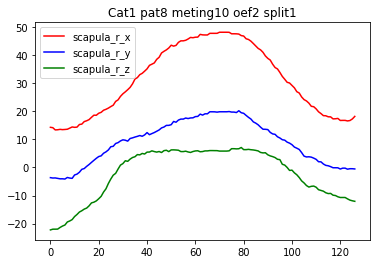

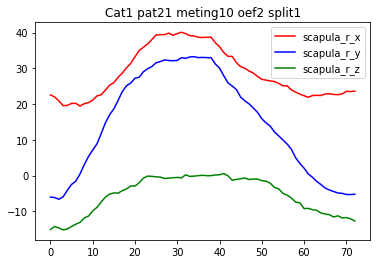

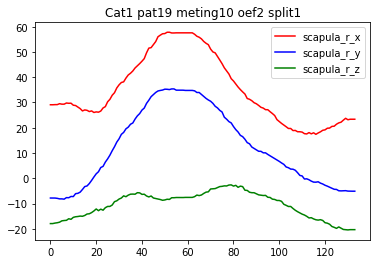

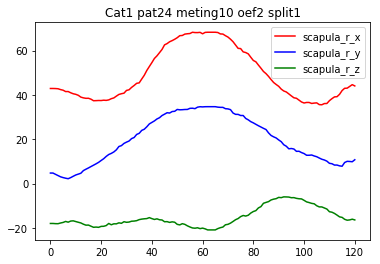

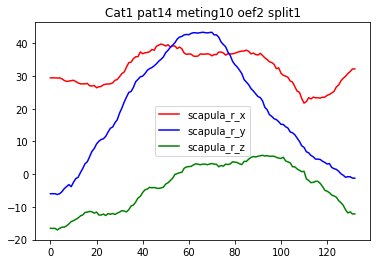

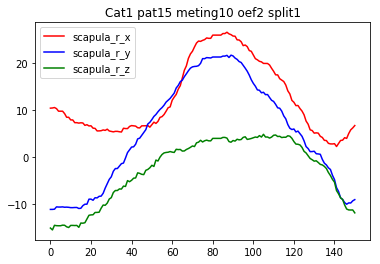

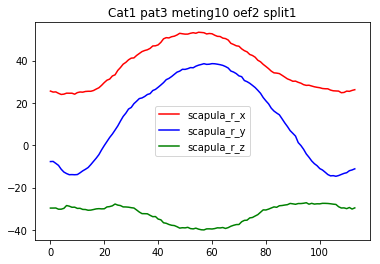

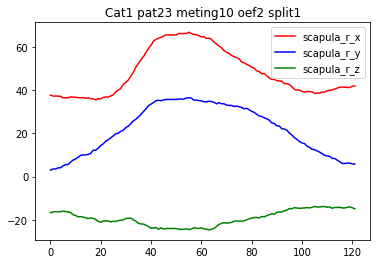

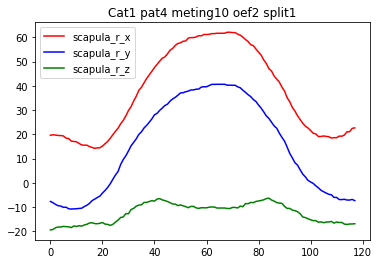

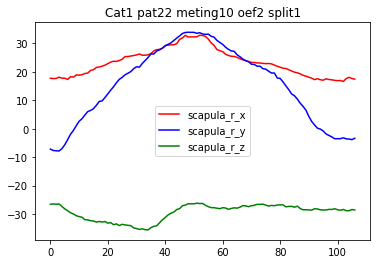

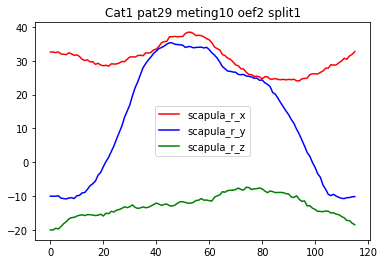

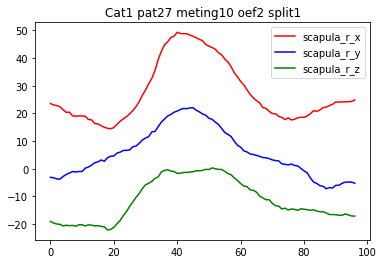

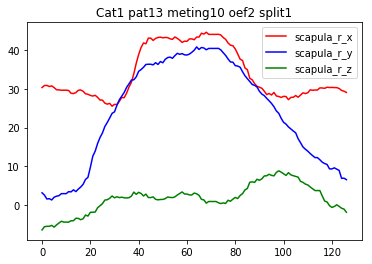

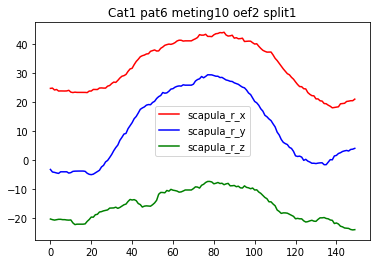

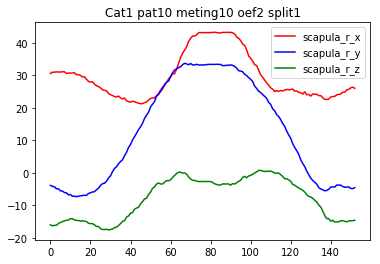

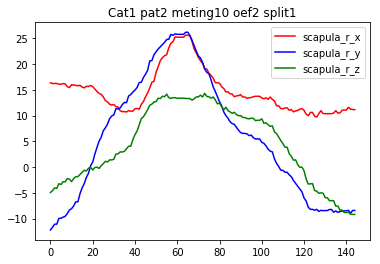

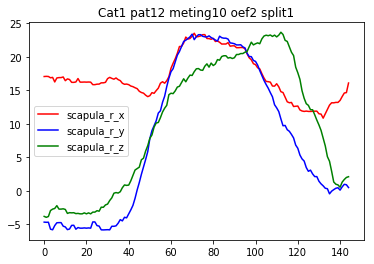

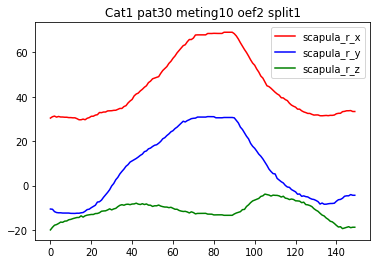

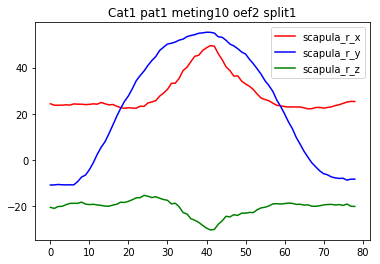

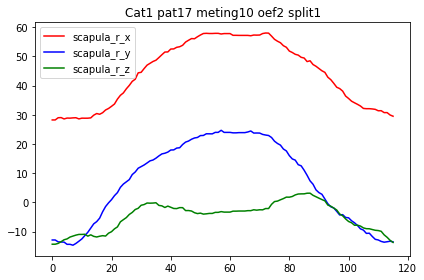

In [7]:

# Makkelijke manier om je eigen data lijst te maken, vul de filters aan in de lijst / verander ze (laata nu oefening 3 zien)
filterlist1 = CreateList(['meting', 'Cat1', 'oef2'])
filterlist2 = CreateList(['meting', 'Cat2', 'oef2'])
filterlist3 = CreateList(['meting', 'Cat4', 'oef3'])
filterlist4 = CreateList(['meting', 'Cat4', 'oef5'], ['oef22'])

# Twee van kaspers meetingen
kasper = ['../EH1_cleaned.csv', 
          '../RF1_cleaned.csv']

# Welke data wil je zien?

# x, y, z = ("thorax_r_x","thorax_r_y", "thorax_r_z")
# x, y, z = ("clavicula_r_x", "clavicula_r_y", "clavicula_r_z")
x, y, z = ("scapula_r_x", "scapula_r_y", "scapula_r_z")
# x, y, z = ("humerus_r_x", "humerus_r_y", "humerus_r_z")
# x, y, z = ("ellebooghoek_r", "ellebooghoek_l", "ellebooghoek_r")

# Print eerst de twee items van kasper, dan de gefilterde lijst
# VisualizeItems(kasper, x, y, z)
VisualizeItems(filterlist1, x, y, z, 0, 0)
# VisualizeItems(filterlist11, x, y, z, 0, 0)
# VisualizeItems(filterlist2, x, y, z, 0, 3)
# VisualizeItems(filterlist3, x, y, z, 0, 0)
# VisualizeItems(filterlist4, x, y, z, 0, 0)
# VisualizeItems(cat4_oef10, x, y, z)
# VisualizeItems(cat4_oef11, x, y, z)
# VisualizeItems(['/data/ortho/Cat2_pat31_meting20_oef3.csv'], x, y, z)


